In [1]:
#using to the same stock data for visualization
import requests
import pandas as pd
from io import StringIO
import csv
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import csv
from matplotlib import pyplot as plt

In [2]:
company_list = ['AMZN', 'TSLA', 'AAPL']
stockdata = []
def getData(company_stock):
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{company_stock}?'
    params = {
           'range': '1y',
           'interval':'1mo',
           'events':'history',
           'includeAdjustedClose':'true'}
    url_info = requests.get(url,params = params, headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"})
    #print(url_info.text)
    file = StringIO(url_info.text)
    reader = csv.reader(file)
    data = list(reader)
    #print(data)

    data_frame = pd.DataFrame(data[1:], columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
    data_frame.insert(1, 'Company Name', f'{company_stock}')
    return pd.DataFrame(data_frame)
    
for company in company_list:
    stockdata.append(getData(company))
    print(f'Getting: {company}')


Getting: AMZN
Getting: TSLA
Getting: AAPL


In [ ]:
combined_list = pd.concat(stockdata)
print(combined_list)
closing_price = combined_list[['Date', 'Company Name', 'Close']]
print(closing_price)


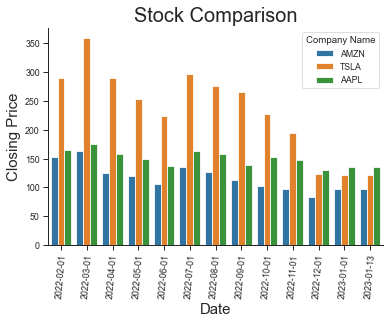

In [18]:
#using seaborn:
closing_price['Close'] = closing_price['Close'].astype('float') #converting the string to float for plotting
ax = sns.barplot(data=closing_price, x='Date', y='Close', hue = 'Company Name')
plt.ylabel('Closing Price', size = 15)
plt.xlabel('Date', size = 15)
sns.set_style('dark')
sns.set_style('ticks')
plt.xticks(rotation=85)
sns.set_context('paper')
sns.despine()
plt.title('Stock Comparison', size = 20)
plt.show()